<a href="https://www.kaggle.com/code/shashankroy568/credit-default?scriptVersionId=262851371" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV ,cross_val_score



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk-analysis-for-extending-bank-loans/bankloans.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-risk-analysis-for-extending-bank-loans/bankloans.csv')
df.head()


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [3]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [4]:
df.value_counts() #Unique values 

age  ed  employ  address  income  debtinc  creddebt  othdebt   default
56   1   11      20       59      15.0     4.672800  4.177200  0.0        1
20   1   4       0        14      9.7      0.200984  1.157016  1.0        1
     3   0       1        17      2.3      0.043792  0.347208  0.0        1
21   1   1       1        16      6.3      0.141120  0.866880  0.0        1
                          18      17.3     0.158814  2.955186  0.0        1
                                                                         ..
23   1   7       3        22      14.4     0.849024  2.318976  0.0        1
     2   0       1        17      27.7     2.043706  2.665294  1.0        1
                          42      3.9      1.018836  0.619164  1.0        1
                 2        21      11.4     0.775656  1.618344  1.0        1
                 4        21      8.7      0.454923  1.372077  0.0        1
Name: count, Length: 700, dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='income'>

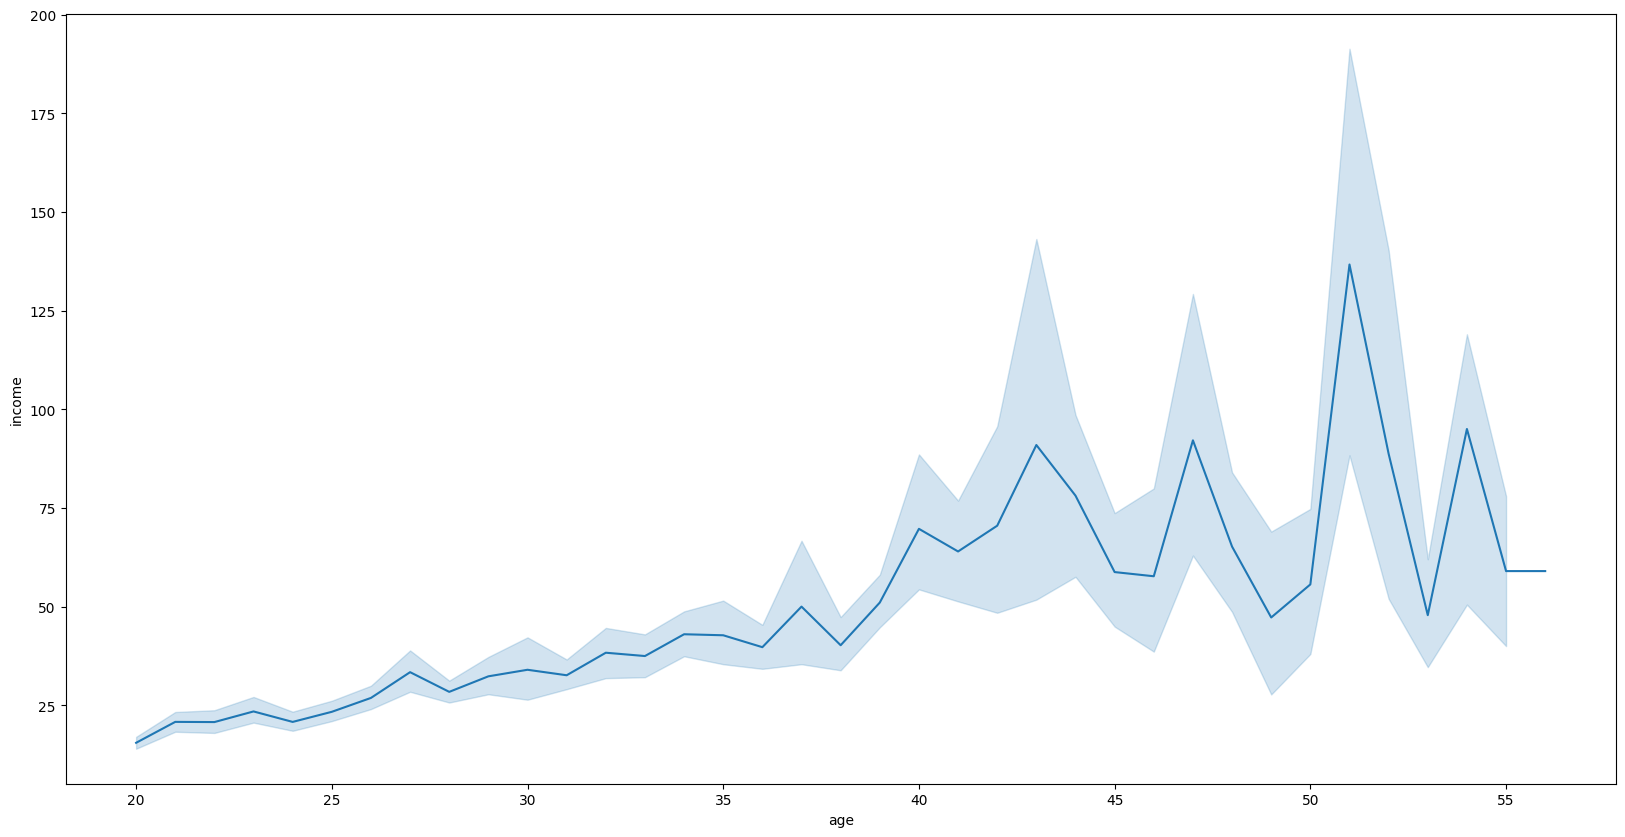

In [6]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x = 'age',y = 'income',data = df , ax = ax)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='debtinc'>

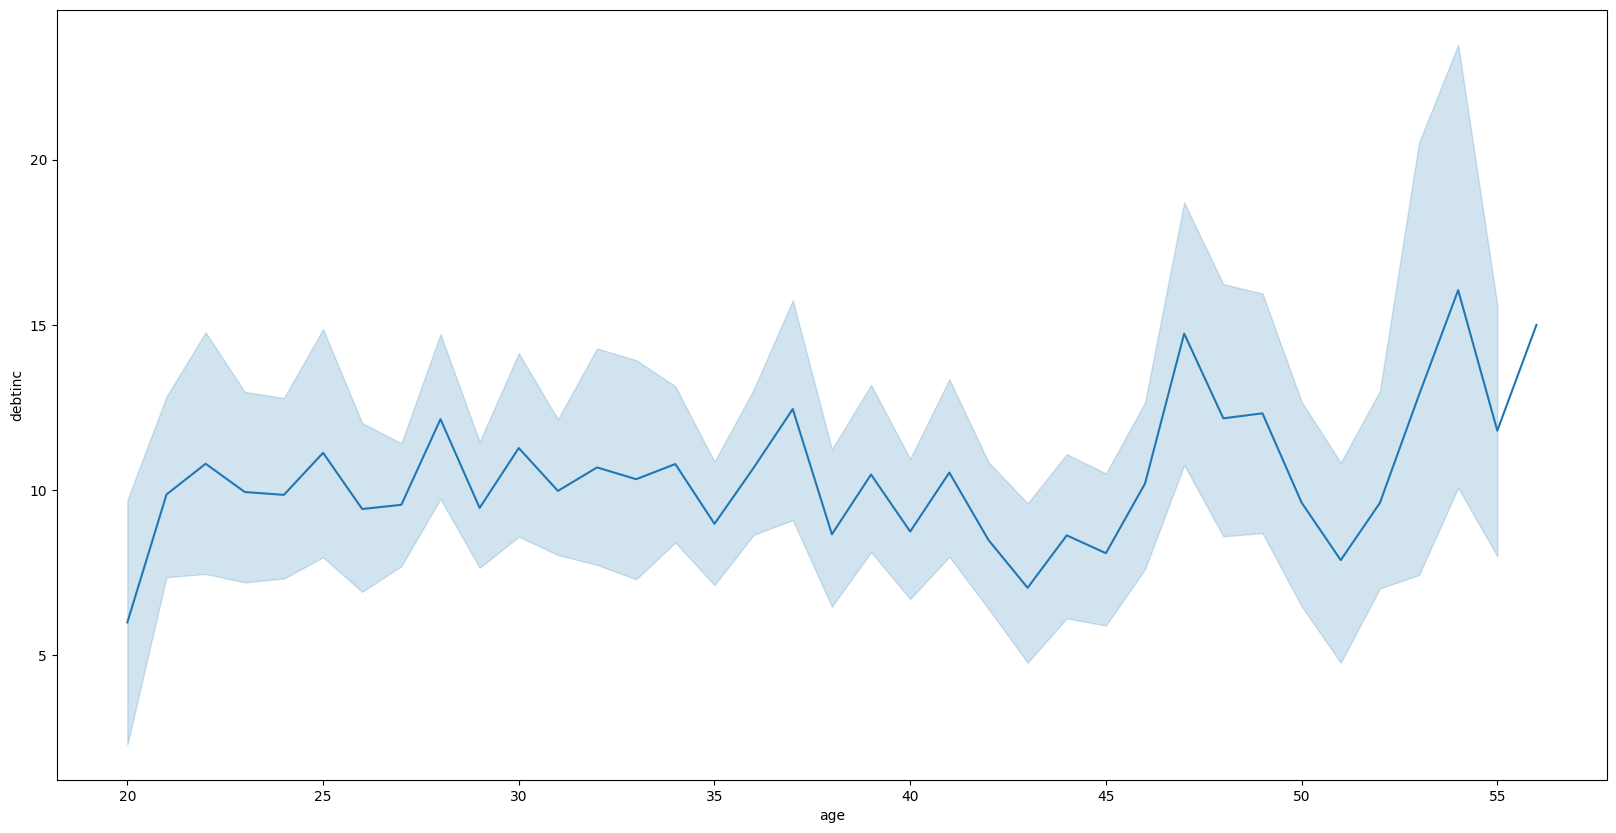

In [7]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age',y='debtinc',data=df,ax=ax)

In [8]:
df['default'].value_counts()

default
0.0    517
1.0    183
Name: count, dtype: int64

In [9]:
X = df.drop(['default'],axis = 1)
y = df['default']
X

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,41,3,17,12,176,9.3,11.359392,5.008608
1,27,1,10,6,31,17.3,1.362202,4.000798
2,40,1,15,14,55,5.5,0.856075,2.168925
3,41,1,15,14,120,2.9,2.658720,0.821280
4,24,2,2,0,28,17.3,1.787436,3.056564
...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938
696,29,2,6,4,21,11.5,0.369495,2.045505
697,33,1,15,3,32,7.6,0.491264,1.940736
698,45,1,19,22,77,8.4,2.302608,4.165392


In [10]:
y

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
695    1.0
696    0.0
697    0.0
698    0.0
699    0.0
Name: default, Length: 700, dtype: float64

In [11]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [12]:
sc = StandardScaler()
Xtrain  = sc.fit_transform(Xtrain)
Xtest = sc.fit_transform(Xtest)

In [13]:
X

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,41,3,17,12,176,9.3,11.359392,5.008608
1,27,1,10,6,31,17.3,1.362202,4.000798
2,40,1,15,14,55,5.5,0.856075,2.168925
3,41,1,15,14,120,2.9,2.658720,0.821280
4,24,2,2,0,28,17.3,1.787436,3.056564
...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938
696,29,2,6,4,21,11.5,0.369495,2.045505
697,33,1,15,3,32,7.6,0.491264,1.940736
698,45,1,19,22,77,8.4,2.302608,4.165392


In [14]:
y

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
695    1.0
696    0.0
697    0.0
698    0.0
699    0.0
Name: default, Length: 700, dtype: float64

MODELS

In [15]:
rfc = RandomForestClassifier(n_estimators = 200)

In [16]:
rfc.fit(Xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [17]:
rfc.score(Xtest,ytest)

0.8142857142857143

In [18]:
rfc2 = cross_val_score(estimator = rfc,X = Xtrain ,y = ytrain, cv = 10)
rfc2.mean()

0.7857142857142858

In [19]:
#SVM


In [20]:
sv = SVC()
sv.fit(Xtrain, ytrain)

SVC()

In [21]:
sv.score(Xtest,ytest)

0.7928571428571428

In [22]:
model = GridSearchCV(sv,{
    'C':[0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0],
    'gamma':[0.1,0.4,0.8,1.0,2.0,3.0],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)

In [23]:
model.fit(Xtrain,ytrain)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [24]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [25]:
model2 = SVC(C = 0.1, gamma = 0.1, kernel = 'linear')
model2.fit(Xtrain,ytrain)
model2.score(Xtest,ytest)

0.8214285714285714

In [26]:
#logistic regression


In [27]:
LR = LogisticRegression()
LR.fit(Xtrain,ytrain)
LR.score(Xtest,ytest)


0.8357142857142857

<Axes: >

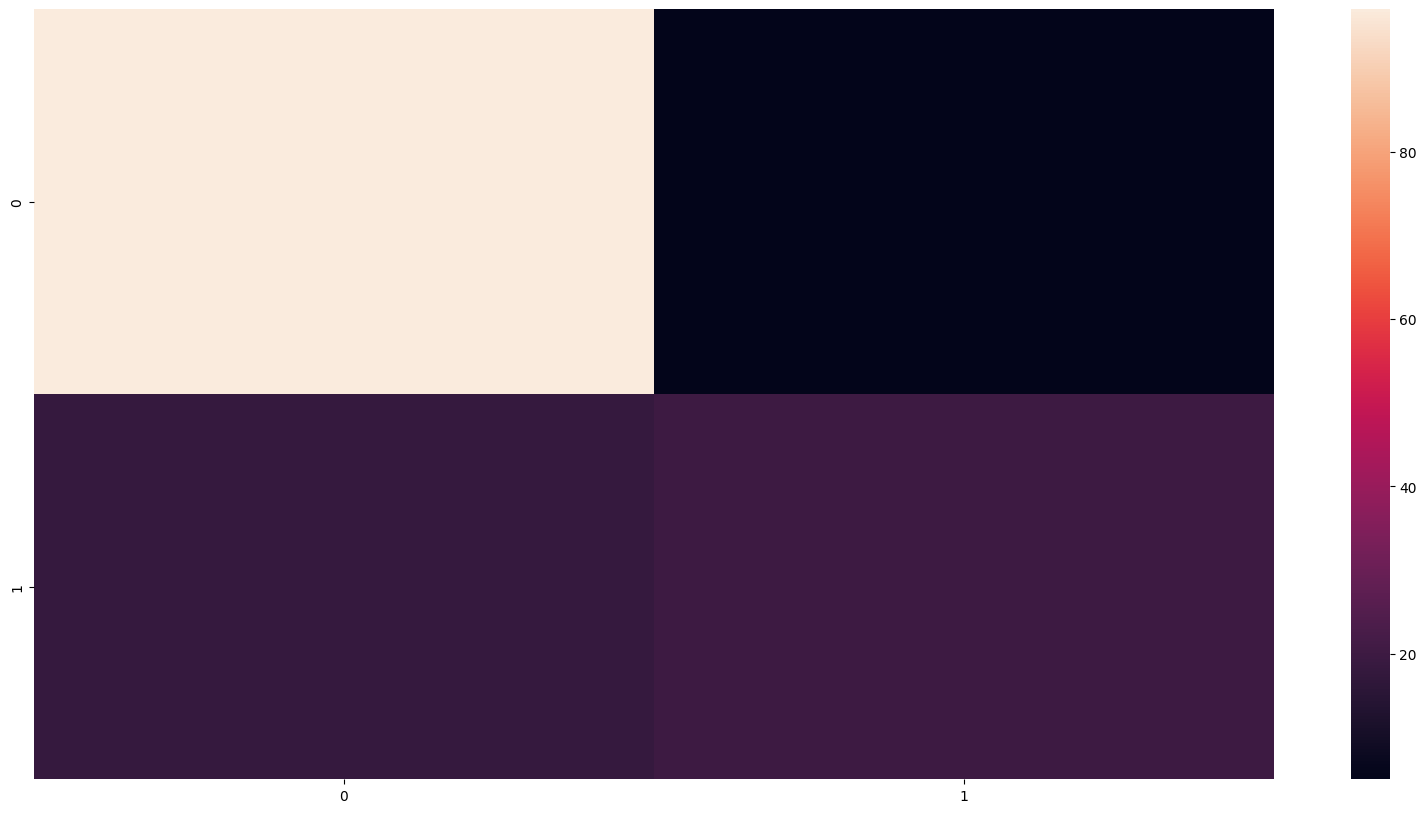

In [28]:
yp = LR.predict(Xtest)
c= confusion_matrix(ytest,yp)
fig ,ax = plt.subplots(figsize=(20,10))
sns.heatmap(c,ax=ax)